#### Case MIN: Isobaric evaporation of NH3 in a large ammonia tank


In [1]:
# Ensure that python finds the submodules
# import sys
# sys.path.append("..") # Adds higher directory to python modules path.

# Scientific computing
import numpy as np

# Visualisation
import matplotlib.pyplot as plt

## Module imports
# Import the storage tank Class
from cryoevap.storage_tanks import Tank

# Import Cryogen class
from cryoevap.cryogens import Cryogen

#### Setup tank and cryogen properties

In [2]:
# LNG tank properties
Q_roof = 0 # Roof heat ingress / W
d_i = 60.0417 # Internal diameter / m
d_o = d_i + 2 * 18 * 0.0254   # External diameter / m

# Coefficients of air temperature, 3rd order polynomial as a function of time
# T_a = p[0] + p[1]*t + p[2]*t**2 + p[3]*t**3 + p[4]*t**4 + p[5]*t**5 + p[6]*t**6
T_air_poly = [273.15+8.2745, -3.0974, 0.6379, -0.0488, 0.0017, -2.875e-5, 1.817e-7]
temp_air_period = 3600 # Polynomial was fit to hourly data

# Set overall heat transfer coefficient through the walls for liquid and vapour
U_L = 0.08 # W/m2/K
U_V = 0.08 # W/m2/K


# Specify heat transfer rate at the bottom to prevent ground heating
Q_b = 0 # W, 

# Vertically orientated cylindrical tank volume
V_tank = 85000 #m^3

# Initial liquid filling / Dimensionless
LF = 0.95 

# Specify tank operating pressure
P = 116325 # Pa

# Initialize large-scale tank
large_tank = Tank(d_i, d_o, V_tank, LF)

large_tank.set_HeatTransProps(U_L, U_V, T_air_poly, Q_b_fixed = None, Q_roof = 0, eta_w = 0.90)

large_tank.U_b = U_L

large_tank.temp_air_period = temp_air_period
# Initialise cryogen
ammonia = Cryogen(name = "ammonia")
ammonia.set_coolprops(P)

# Set cryogen
large_tank.cryogen = ammonia

# Calculate initial evaporation rate
print("The initial evaporation rate of " + ammonia.name + " is %.1f kg/h" % (large_tank.b_l_dot * 3600))

The initial evaporation rate of ammonia is 70.2 kg/h


In [3]:
large_tank.T_air

281.42449999999997

Calculate initial evaporation rate and transient period

In [4]:
# Calculate initial evaporation rate
print("The initial evaporation rate of " + ammonia.name + " is %.1f kg/h" % (large_tank.b_l_dot * 3600))

# Estimate transient period duration
print("Transient period = %.3f s " % large_tank.tau)

# Minimum number of hours to achieve steady state 
tau_h = (np.floor(large_tank.tau / 3600) + 1)

# Print simulation time of the transient period for short-term storage
print("Simulation time: %.0i h" % tau_h )

# Calculate boil-off rate
BOR = (large_tank.b_l_dot * 24 * 3600) / (large_tank.V * large_tank.LF * large_tank.cryogen.rho_L)
print("BOR = %.3f %%" % (BOR * 100))

The initial evaporation rate of ammonia is 70.2 kg/h
Transient period = 220689.081 s 
Simulation time: 62 h
BOR = 0.003 %


#### Simulation setup and execution

In [ ]:
# Define vertical spacing
dz = 0.1

# Calculate number of nodes
n_z = 1 + int(np.round(large_tank.l_V/dz, 0))

# Define dimensionless computational grid
large_tank.z_grid = np.linspace(0, 1, n_z)

# Insulated roof
large_tank.U_roof = 0

# Define evaporation time as 48 weeks
evap_time = 3600 * 24

# Time step to record data, relevant for plotting integrated quantities
# such as the vapour to liquid heat transfer rate, Q_VL
large_tank.time_interval = 3600

# Time step to plot each vapour temperature profile
large_tank.plot_interval = evap_time/6

# Simulate the evaporation
large_tank.evaporate(evap_time)

#### Visualisation of results

#### Vapour temperature

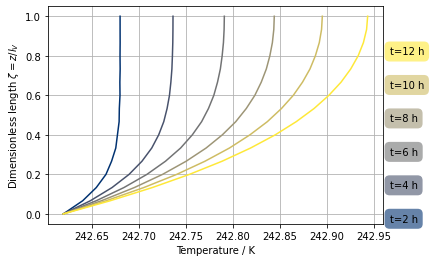

In [6]:
# Visualise the plot
large_tank.plot_tv(t_unit='h')
plt.savefig("swagT.svg")

Visualise liquid and vapour heat ingresses, $\dot{Q}_{\text{L}}$ and  $\dot{Q}_{\text{V}}$.

The plot also shows the vapour to liquid heat ingress, $\dot{Q}_{VL}$, and  the partition of the vapour heat ingress that is transferred to the interface by the wall directly, $\dot{Q}_{\text{V,w}}$

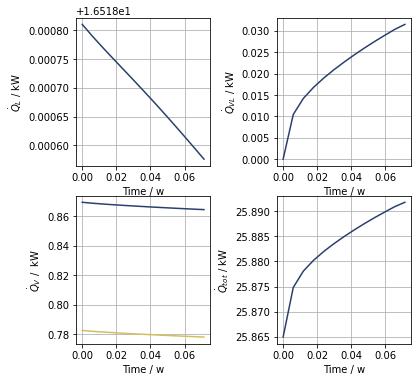

In [7]:
large_tank.plot_Q(unit='kW', t_unit='w')

#### Plot liquid volume

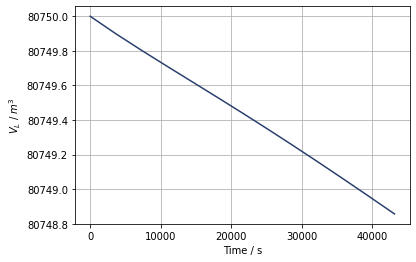

In [8]:
large_tank.plot_V_L()

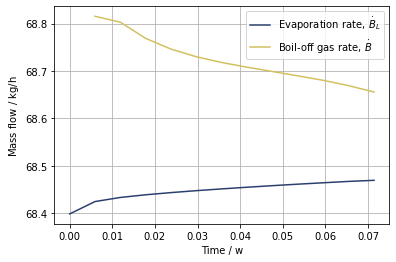

<Figure size 432x288 with 0 Axes>

In [9]:
large_tank.plot_BOG(unit='kg/h', t_unit='w')
plt.savefig("swagBOG.svg")


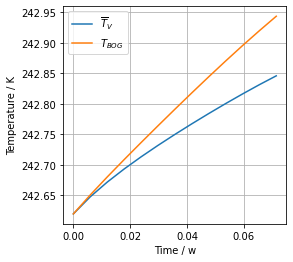

In [10]:
large_tank.plot_tv_BOG(t_unit='w')
plt.savefig("swag.svg")

#### References



F. Huerta, V. Vesovic, A realistic vapour phase heat transfer model for the weathering of LNG stored in large tanks, Energy, 174 (2019) 280-291.